In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from genCo import getGenCos, plotResults 
from main import getFutureData
from utilsData import fuelDict, getISO

In [6]:
dfISO, numGenerators, totalCap, totalCSO = getISO()

Total Capacity:  38389.70230400001 Number of Generators:  2585


In [9]:
cap_rate = 1.0
# fuelMappingDict = dict(zip(dfISO['Technology'].tolist(), dfISO['Energy Source Code'].tolist()))
genCos = getGenCos(numGenerators, dfISO, esCharge=1)
dfCSO = pd.read_csv('data/CSO2023.csv', skiprows=0, index_col=None)

{'Landfill Gas': 50.34799999999999, 'Gas': 15689.128999999997, 'Hydro': 3385.012999999998, 'Oil': 4944.697000000008, 'Refuse/Woods': 734.3950000000002, 'Coal': 438.0, 'Nuclear': 3333.1130000000003, 'Wind': 559.6179999999999, 'Gas-Other': 3.7969999999999984, 'Solar': 29.560000000000045, 'ES': 21.926000000000013}
{'Landfill Gas': 96.12375, 'Gas': 18074.166368999995, 'Hydro': 3747.6769149999986, 'Oil': 6789.64676, 'Refuse/Woods': 1122.8823899999998, 'Coal': 651.83545, 'Nuclear': 3606.65085, 'Wind': 1491.2266999999995, 'Gas-Other': 16.106, 'Solar': 2617.8115199999884, 'ES': 175.5756}
{'Landfill Gas': 51.309999999999995, 'Gas': 15564.601000000004, 'Hydro': 3217.518, 'Oil': 4951.742999999994, 'Refuse/Woods': 724.392, 'Coal': 438.0, 'Nuclear': 3333.1130000000003, 'Wind': 270.218, 'Gas-Other': 3.4519999999999995, 'Solar': 401.54499999999973, 'ES': 21.926000000000013}
{'Landfill Gas': 96.12375, 'Gas': 18074.166368999995, 'Hydro': 3747.6769149999986, 'Oil': 6789.64676, 'Refuse/Woods': 1122.88238

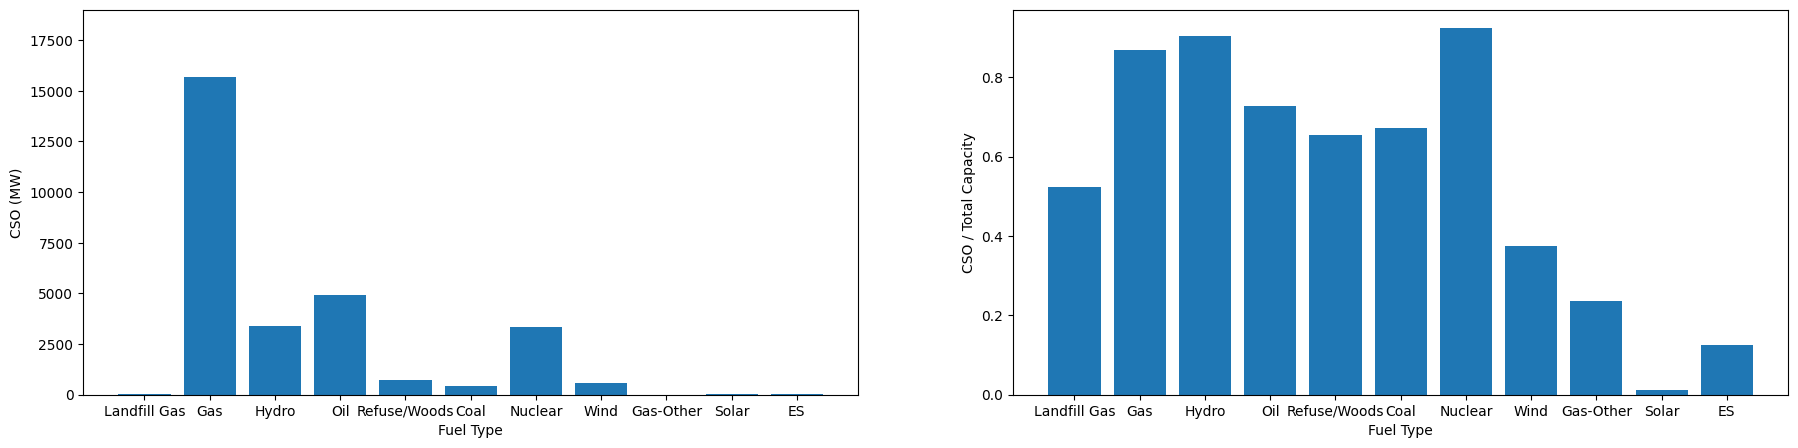

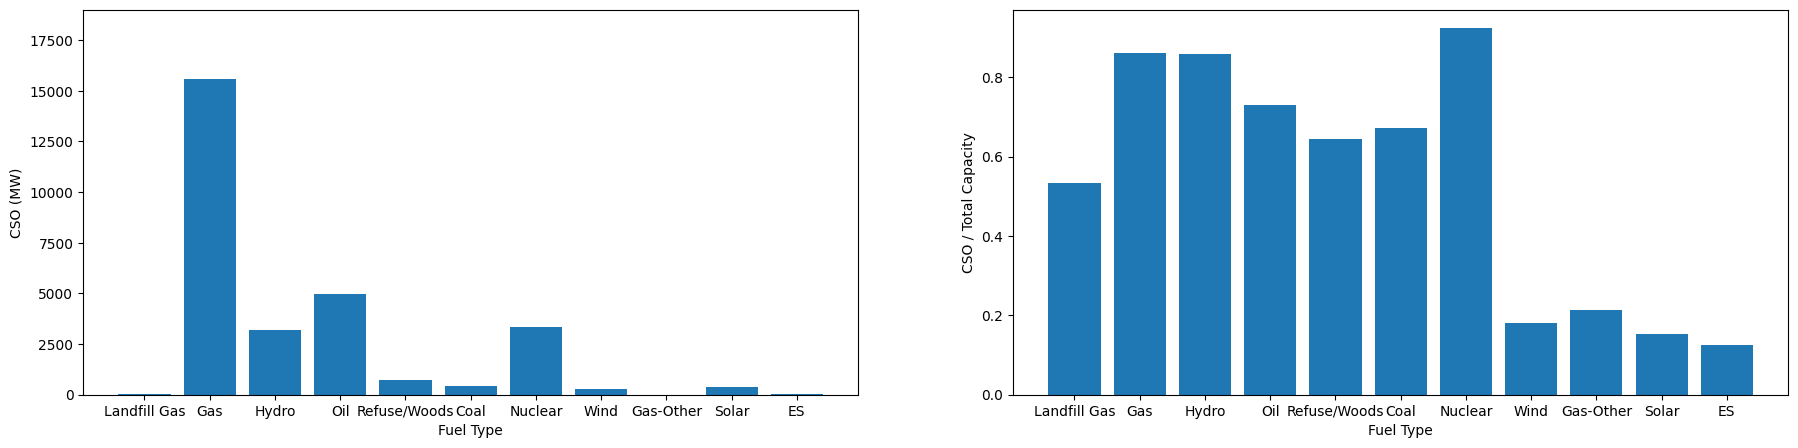

In [10]:
for month in ['January', 'July']:
    for gen in genCos: gen.updateCSO(dfCSO, dfISO, cap_rate, [1, 1], month);
    
    plt.figure(figsize=(22, 5))
    plt.subplot(1, 2, 1)
    csoHist = {}
    for genco in genCos:
        temp = genco.CapObl

        if genco.fuelType in csoHist:
            csoHist[genco.fuelType] += temp
        else:
            csoHist[genco.fuelType] = temp
    print(csoHist)

    labels = list(csoHist.keys())
    weights = list(csoHist.values())

    plt.bar(labels, weights)
    plt.xlabel('Fuel Type')
    plt.ylabel('CSO (MW)');
    plt.ylim(0, 19000)

    plt.subplot(1, 2, 2)
    capHist = {}
    for genco in genCos:
        temp = genco.MaxCap

        if genco.fuelType in capHist:
            capHist[genco.fuelType] += temp
        else:
            capHist[genco.fuelType] = temp
    print(capHist)

    # del capHist['Other']; del csoHist['Waste']
    # del csoHist['Other']; del capHist['Waste']
    labels = list(csoHist.keys())
    weights = list(csoHist.values())
    labels2 = list(capHist.keys())
    weights2 = list(capHist.values())

    plt.bar(labels2, np.array(weights) / np.array(weights2))
    # plt.ylim(0, 19000)
    plt.xlabel('Fuel Type')
    plt.ylabel('CSO / Total Capacity');

In [11]:
__, __, __, dfISO, info = getFutureData(ISO='ISNE', verbose=False, path='data/forecast/' , 
                                                                        load_rate='high', vre_mix='high')
numGenerators, totalCap, adjRatios, cap_rate, LOLE = info[0][0], info[1][0], info[2], info[3][0], info[4][0]
genCos = getGenCos(numGenerators, dfISO)
dfCSO = pd.read_csv('data/CSO2023.csv', skiprows=0, index_col=None)

TypeError: unsupported operand type(s) for /: 'NoneType' and 'float'

{'Landfill Gas': 50.348, 'Gas': 15689.129, 'Hydro': 3385.0129999999976, 'Oil': 4944.697000000007, 'Refuse/Woods': 734.3950000000001, 'Coal': 438.0, 'Nuclear': 3333.1130000000003, 'Wind': 559.6179999999999, 'Gas-Other': 3.7969999999999984, 'Solar': 29.560000000000045, 'ES': 21.926000000000016}
{'Landfill Gas': 96.12375, 'Gas': 18074.166368999995, 'Hydro': 3747.6769149999986, 'Oil': 6789.64676, 'Refuse/Woods': 1122.8823899999998, 'Coal': 651.83545, 'Nuclear': 3606.65085, 'Wind': 1491.2266999999995, 'Gas-Other': 16.106, 'Solar': 2617.8115199999884, 'ES': 175.5756}
{'Landfill Gas': 51.30999999999999, 'Gas': 15564.601000000004, 'Hydro': 3217.517999999999, 'Oil': 4951.742999999993, 'Refuse/Woods': 724.392, 'Coal': 438.0, 'Nuclear': 3333.1130000000003, 'Wind': 270.218, 'Gas-Other': 3.4519999999999995, 'Solar': 401.54499999999973, 'ES': 21.926000000000016}
{'Landfill Gas': 96.12375, 'Gas': 18074.166368999995, 'Hydro': 3747.6769149999986, 'Oil': 6789.64676, 'Refuse/Woods': 1122.8823899999998, '

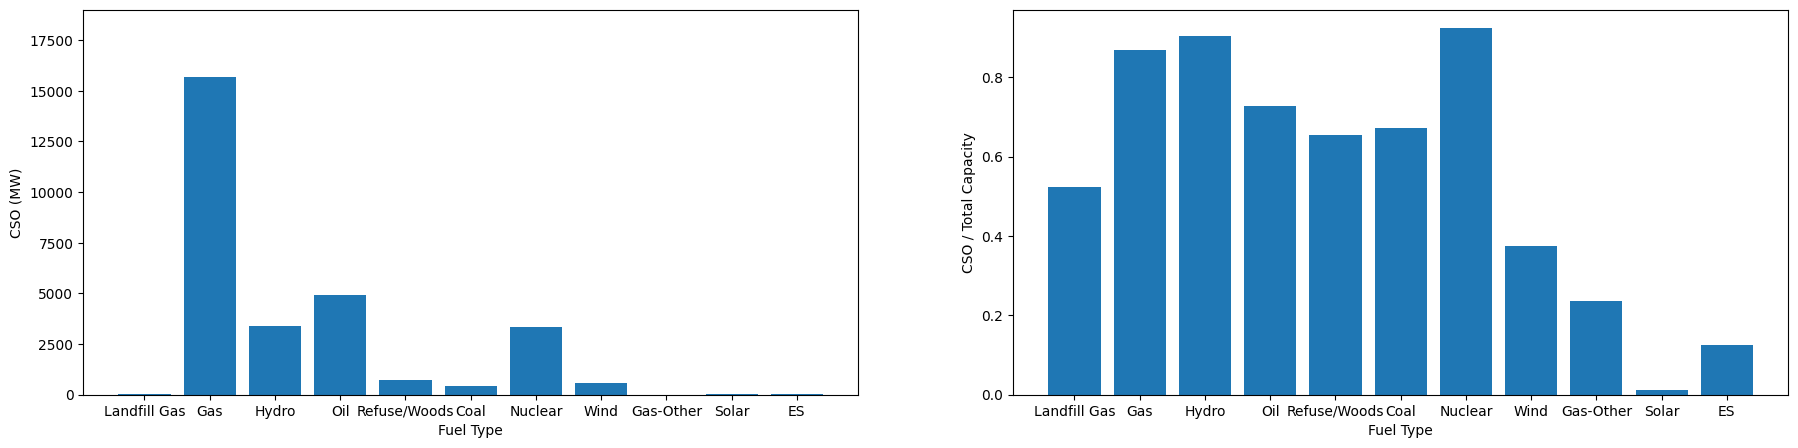

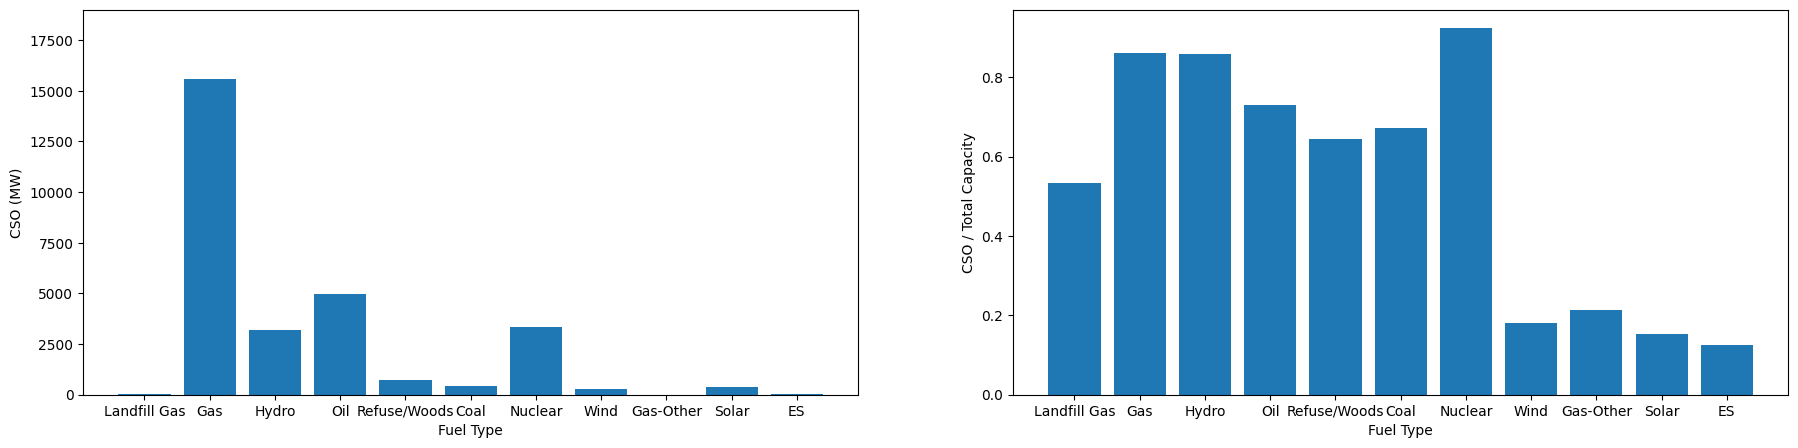

In [12]:
for month in ['January', 'July']:    
    for gen in genCos: gen.updateCSO(dfCSO, dfISO, cap_rate, adjRatios, month);

    plt.figure(figsize=(22, 5))
    plt.subplot(1, 2, 1)
    csoHist = {}
    for genco in genCos:
        temp = genco.CapObl

        if genco.fuelType in csoHist:
            csoHist[genco.fuelType] += temp
        else:
            csoHist[genco.fuelType] = temp
    print(csoHist)

    labels = list(csoHist.keys())
    weights = list(csoHist.values())

    plt.bar(labels, weights)
    plt.xlabel('Fuel Type')
    plt.ylabel('CSO (MW)');
    plt.ylim(0, 19000)

    plt.subplot(1, 2, 2)
    capHist = {}
    for genco in genCos:
        temp = genco.MaxCap

        if genco.fuelType in capHist:
            capHist[genco.fuelType] += temp
        else:
            capHist[genco.fuelType] = temp
    print(capHist)

    # del capHist['Other']; del csoHist['Waste']
    # del csoHist['Other']; del capHist['Waste']
    labels = list(csoHist.keys())
    weights = list(csoHist.values())
    labels2 = list(capHist.keys())
    weights2 = list(capHist.values())

    plt.bar(labels2, np.array(weights) / np.array(weights2))
    # plt.ylim(0, 19000)
    plt.xlabel('Fuel Type')
    plt.ylabel('CSO / Total Capacity');

In [13]:
import datetime

def plotData(dfHourlyLoad, dfHourlySolar, dfHourlyWind, totalCap, totalCSO, yearPlot="2023"):
    month, day, year = map(int,dfHourlyLoad.loc[0]['Date'].split('/'))
    start = datetime(year, month, day, int(dfHourlyLoad.loc[0]['Hour Ending']) - 1)
    month, day, year = map(int,dfHourlyLoad.loc[len(dfHourlyLoad) - 1]['Date'].split('/'))
    end =  datetime(year, month, day, int(dfHourlyLoad.loc[len(dfHourlyLoad) - 1]['Hour Ending']) - 1)

    timeRange = pd.date_range(start, end, periods=len(dfHourlyLoad))


    plt.plot(timeRange, dfHourlyLoad['Total Load'], label='Total Load')
    plt.plot(timeRange, dfHourlySolar['tot_solar_mwh'], label='Solar')
    plt.plot(timeRange, dfHourlyWind['tot_wind_mwh'], label='Wind')
    plt.plot(timeRange, totalCap * np.ones(len(dfHourlyLoad)), 'k--', label='Total Capacity')
    plt.plot(timeRange, totalCSO * np.ones(len(dfHourlyLoad)), 'k--', label='Total CSO')

    plt.xlabel('Date')
    plt.ylabel('Load (MW)')
    plt.title('Hourly Load of ' + yearPlot)
    plt.legend()

In [14]:
dfISO = pd.read_csv('data/CELT2023.csv')

{'Landfill Gas': 96.12375, 'Gas': 18074.166368999995, 'Hydro': 3747.6769149999986, 'Oil': 6789.64676, 'Refuse/Woods': 1122.8823899999998, 'Coal': 651.83545, 'Nuclear': 3606.65085, 'Wind': 1491.2266999999995, 'Gas-Other': 16.106, 'Solar': 2617.8115199999884, 'ES': 175.5756}
['Landfill Gas', 'Gas', 'Hydro', 'Oil', 'Refuse/Woods', 'Coal', 'Nuclear', 'Wind', 'Gas-Other', 'Solar', 'ES']


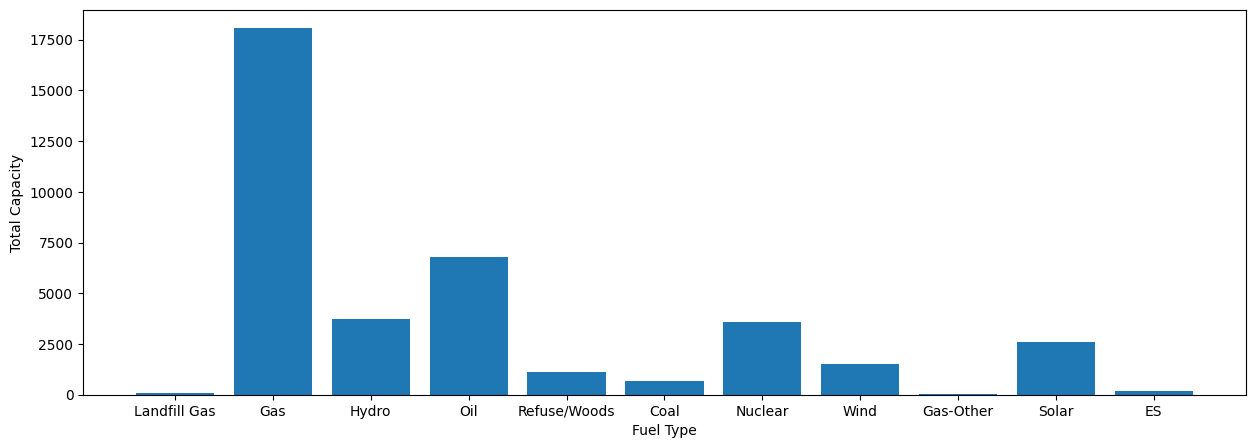

In [15]:
for month in ['January']:    
    plt.figure(figsize=(15, 5))
    capHist = {}
    for i in range(len(dfISO)):
        genco = dfISO.iloc[i]
        temp = genco['Nameplate Capacity (MW)']

        fuelType = fuelDict[genco['Primary Fuel Type']]
        # fuelType = genco['Primary Fuel Type']


        if fuelType in capHist:
            capHist[fuelType] += temp
        else:
            capHist[fuelType] = temp
    print(capHist)

    # del capHist['Other']; del csoHist['Waste']
    # del csoHist['Other']; del capHist['Waste']
    labels = list(csoHist.keys())
    weights = list(csoHist.values())
    labels2 = list(capHist.keys())
    weights2 = list(capHist.values())
    print(labels2)
    plt.bar(labels2, np.array(weights2))
    # plt.ylim(0, 19000)
    plt.xlabel('Fuel Type')
    plt.ylabel('Total Capacity');